<a href="https://colab.research.google.com/github/wannasmile/colab_code_note/blob/main/TREE02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install anytree

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from anytree import Node, RenderTree
udo = Node("Udo")
marc = Node("Marc", parent=udo)
lian = Node("Lian", parent=marc)
dan = Node("Dan", parent=udo)
jet = Node("Jet", parent=dan)
jan = Node("Jan", parent=dan)
joe = Node("Joe", parent=dan)

In [3]:
print(udo)

Node('/Udo')


In [4]:
print(joe)

Node('/Udo/Dan/Joe')


In [5]:
for pre, fill, node in RenderTree(udo):
    print("%s%s" % (pre, node.name))

Udo
├── Marc
│   └── Lian
└── Dan
    ├── Jet
    ├── Jan
    └── Joe


In [6]:
from anytree.exporter import DotExporter
# graphviz needs to be installed for the next line!
DotExporter(udo).to_picture("udo.png")

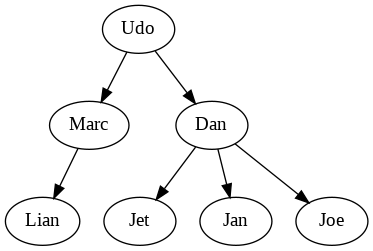

In [7]:
from IPython.display import Image
Image("udo.png")

In [8]:
DotExporter(dan,
            nodeattrfunc=lambda node: "fixedsize=true, width=1, height=1, shape=diamond",
            edgeattrfunc=lambda parent, child: "style=bold"
).to_picture("dan.png")

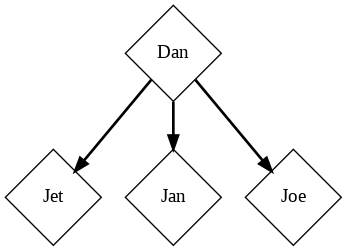

In [9]:
Image("dan.png")

In [10]:
mary = Node("Mary")
urs = Node("Urs", parent=mary)
chris = Node("Chris", parent=mary)
marta = Node("Marta", parent=mary)
print(RenderTree(mary))

Node('/Mary')
├── Node('/Mary/Urs')
├── Node('/Mary/Chris')
└── Node('/Mary/Marta')


In [11]:
udo.parent = mary
print(RenderTree(mary))

Node('/Mary')
├── Node('/Mary/Urs')
├── Node('/Mary/Chris')
├── Node('/Mary/Marta')
└── Node('/Mary/Udo')
    ├── Node('/Mary/Udo/Marc')
    │   └── Node('/Mary/Udo/Marc/Lian')
    └── Node('/Mary/Udo/Dan')
        ├── Node('/Mary/Udo/Dan/Jet')
        ├── Node('/Mary/Udo/Dan/Jan')
        └── Node('/Mary/Udo/Dan/Joe')


In [12]:
print(RenderTree(marc))

Node('/Mary/Udo/Marc')
└── Node('/Mary/Udo/Marc/Lian')


In [13]:
dan.parent = None
print(RenderTree(dan))

Node('/Dan')
├── Node('/Dan/Jet')
├── Node('/Dan/Jan')
└── Node('/Dan/Joe')


In [14]:
from anytree import NodeMixin, RenderTree
class MyBaseClass(object):  # Just an example of a base class
    foo = 4
class MyClass(MyBaseClass, NodeMixin):  # Add Node feature
    def __init__(self, name, length, width, parent=None, children=None):
        super(MyClass, self).__init__()
        self.name = name
        self.length = length
        self.width = width
        self.parent = parent
        if children:
            self.children = children

In [15]:
my0 = MyClass('my0', 0, 0)
my1 = MyClass('my1', 1, 0, parent=my0)
my2 = MyClass('my2', 0, 2, parent=my0)

In [16]:
for pre, fill, node in RenderTree(my0):
    treestr = u"%s%s" % (pre, node.name)
    print(treestr.ljust(8), node.length, node.width)

my0      0 0
├── my1  1 0
└── my2  0 2


In [17]:
my0 = MyClass('my0', 0, 0, children=[
    MyClass('my1', 1, 0),
    MyClass('my2', 0, 2),
])

In [18]:
for pre, fill, node in RenderTree(my0):
    treestr = u"%s%s" % (pre, node.name)
    print(treestr.ljust(8), node.length, node.width)

my0      0 0
├── my1  1 0
└── my2  0 2


In [19]:

from anytree.importer import JsonImporter
from anytree import RenderTree
importer = JsonImporter()
data = '''
{
  "a": "root",
  "children": [
    {
      "a": "sub0",
      "children": [
        {
          "a": "sub0A",
          "b": "foo"
        },
        {
          "a": "sub0B"
        }
      ]
    },
    {
      "a": "sub1"
    }
  ]
}'''
root = importer.import_(data)
print(RenderTree(root))



AnyNode(a='root')
├── AnyNode(a='sub0')
│   ├── AnyNode(a='sub0A', b='foo')
│   └── AnyNode(a='sub0B')
└── AnyNode(a='sub1')


In [20]:
!pip install pyyaml

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [21]:

import yaml
from anytree import AnyNode
from anytree.exporter import DictExporter
root = AnyNode(a="root")
s0 = AnyNode(a="sub0", parent=root)
s0a = AnyNode(a="sub0A", b="foo", parent=s0)
s0b = AnyNode(a="sub0B", parent=s0)
s1 = AnyNode(a="sub1", parent=root)
dct = DictExporter().export(root)
print(yaml.dump(dct, default_flow_style=False))

import yaml
from anytree.importer import DictImporter
from pprint import pprint  # just for nice printing
from anytree import RenderTree  # just for nice printing
data = """
a: root
children:
- a: sub0
  children:
  - a: sub0A
    b: foo
  - a: sub0B
- a: sub1
"""
dct = yaml.load(data, Loader=yaml.FullLoader)
pprint(dct)
root = DictImporter().import_(dct)
print(RenderTree(root))




a: root
children:
- a: sub0
  children:
  - a: sub0A
    b: foo
  - a: sub0B
- a: sub1

{'a': 'root',
 'children': [{'a': 'sub0',
               'children': [{'a': 'sub0A', 'b': 'foo'}, {'a': 'sub0B'}]},
              {'a': 'sub1'}]}
AnyNode(a='root')
├── AnyNode(a='sub0')
│   ├── AnyNode(a='sub0A', b='foo')
│   └── AnyNode(a='sub0B')
└── AnyNode(a='sub1')
